In [1]:
    import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
immo_H_clean = pd.read_csv('../data/cleaned/immo_house_not_outliers.csv')
immo_AP_clean = pd.read_csv('../data/cleaned/immo_apartment_not_outliers.csv')

immo_H_clean.head()

,Price,Facades,Habitable Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,Municipality,Province,APARTMENT,HOUSE
0,269000,2.0,178.000000,HOUSE,4.0,1.0,2.0,5.0,3.0,0,0,21.915179,3.0,32.000000,5.0,107.000000,TURNHOUT,ANTWERPEN,0,1
1,99000,4.0,33.000000,HOUSE,1.0,1.0,1.0,3.0,1.0,0,1,6.000000,3.0,36.465753,4.0,371.896623,LILLE,ANTWERPEN,0,1
2,584000,3.0,284.000000,HOUSE,4.0,1.0,2.0,7.0,1.0,0,0,21.915179,1.0,36.465753,4.0,371.896623,BORNEM,ANTWERPEN,0,1
3,299000,3.0,205.541958,HOUSE,3.0,1.0,1.0,4.0,1.0,0,0,21.915179,2.0,41.000000,1.0,519.000000,HEIST-OP-DEN-BERG,ANTWERPEN,0,1
4,380600,3.0,209.000000,HOUSE,3.0,1.0,2.0,6.0,1.0,0,0,21.915179,3.0,41.000000,4.0,371.896623,LAAKDAL,ANTWERPEN,0,1


In [3]:
immo_AP_clean

,Price,Facades,Habitable Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,Municipality,Province,APARTMENT,HOUSE
0,175000,2.0,90.0,APARTMENT,2.0,1.0,1.0,4.0,1.0,0,1,7.000000,3.0,37.000000,5.0,124.000000,ANTWERPEN,ANTWERPEN,1,0
1,249000,2.0,83.0,APARTMENT,1.0,1.0,1.0,3.0,1.0,0,1,2.000000,3.0,41.000000,5.0,188.000000,MORTSEL,ANTWERPEN,1,0
2,265000,3.0,82.0,APARTMENT,1.0,1.0,1.0,3.0,1.0,0,1,13.000000,3.0,42.000000,5.0,196.697603,HERENTHOUT,ANTWERPEN,1,0
3,269000,3.0,82.0,APARTMENT,1.0,1.0,1.0,3.0,1.0,0,1,8.000000,3.0,35.000000,5.0,196.697603,HERENTHOUT,ANTWERPEN,1,0
4,299000,3.0,94.0,APARTMENT,2.0,1.0,1.0,4.0,1.0,0,1,13.000000,3.0,29.000000,5.0,196.697603,HERENTHOUT,ANTWERPEN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,565000,2.0,72.0,APARTMENT,2.0,1.0,1.0,4.0,1.0,0,1,21.578797,3.0,34.267442,7.0,100.000000,KNOKKE-HEIST,WEST-VLAANDEREN,1,0
7108,239000,2.0,84.0,APARTMENT,2.0,1.0,1.0,4.0,1.0,0,0,21.578797,3.0,34.267442,5.0,124.000000,BLANKENBERGE,WEST-VLAANDEREN,1,0
7109,369000,2.0,80.0,APARTMENT,2.0,1.0,1.0,4.0,1.0,0,1,5.000000,5.0,34.267442,5.0,174.000000,OOSTENDE,WEST-VLAANDEREN,1,0
7110,269000,2.0,45.0,APARTMENT,1.0,1.0,1.0,2.0,1.0,0,1,21.578797,3.0,34.267442,4.0,259.000000,KOKSIJDE,WEST-VLAANDEREN,1,0


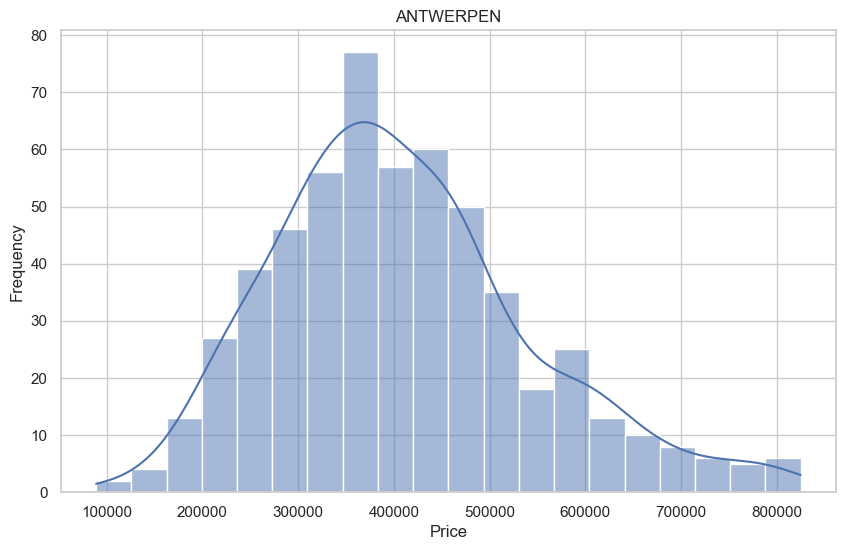

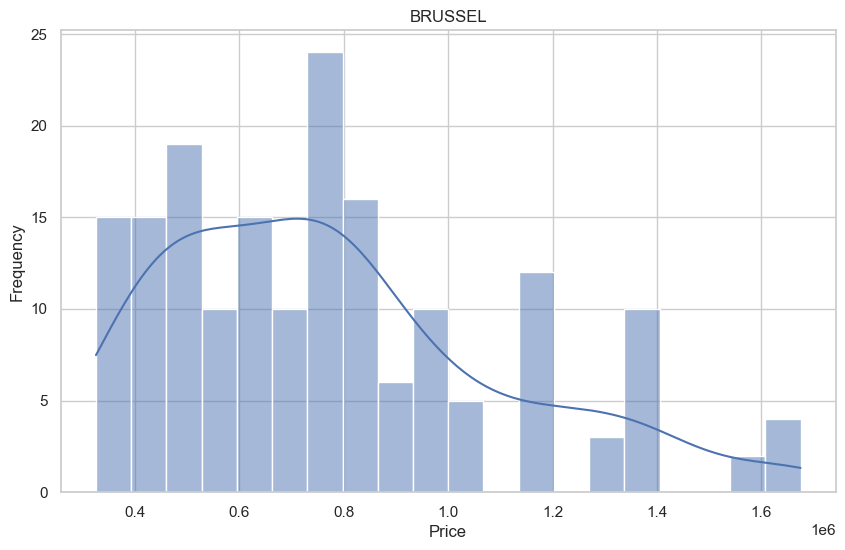

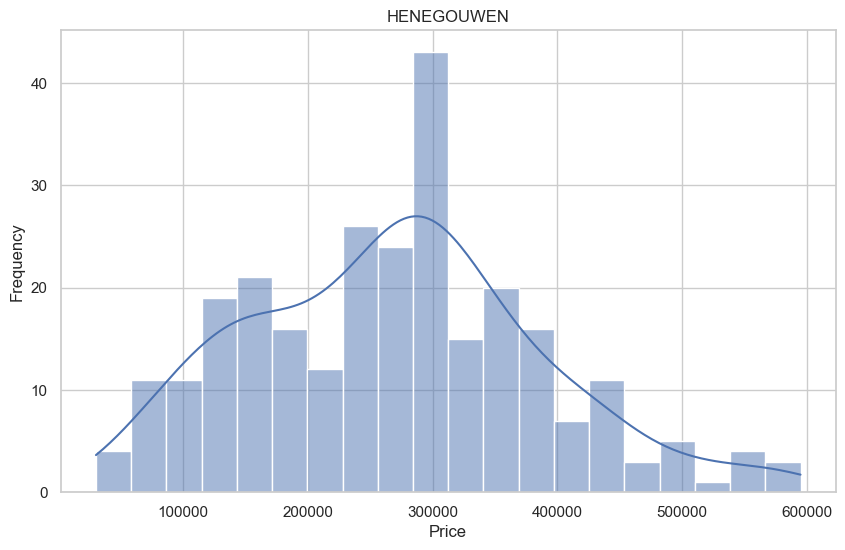

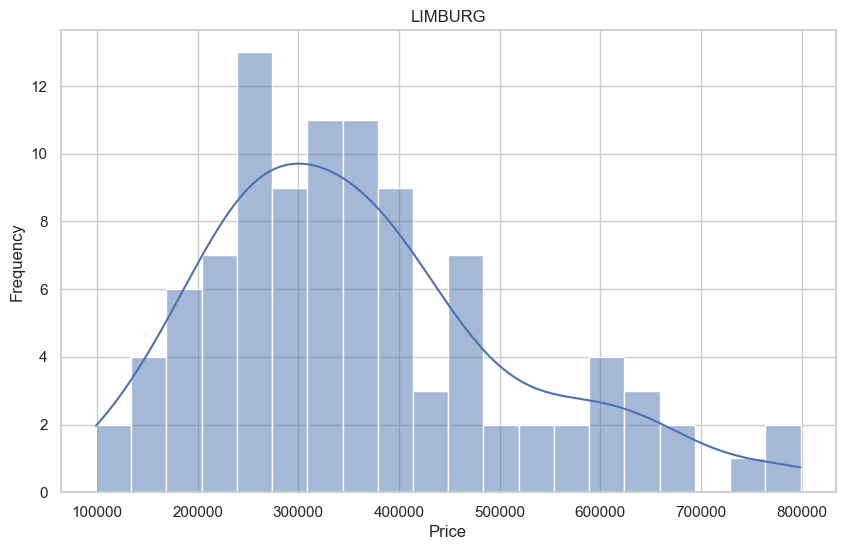

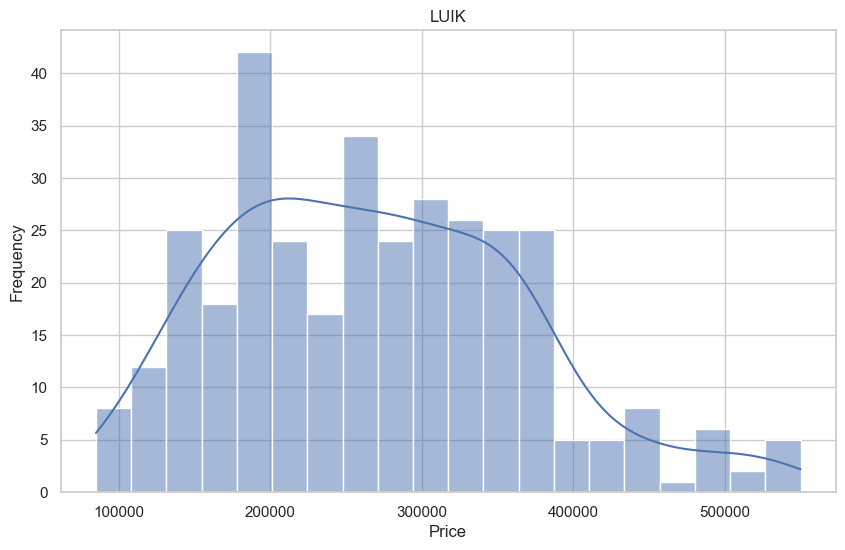

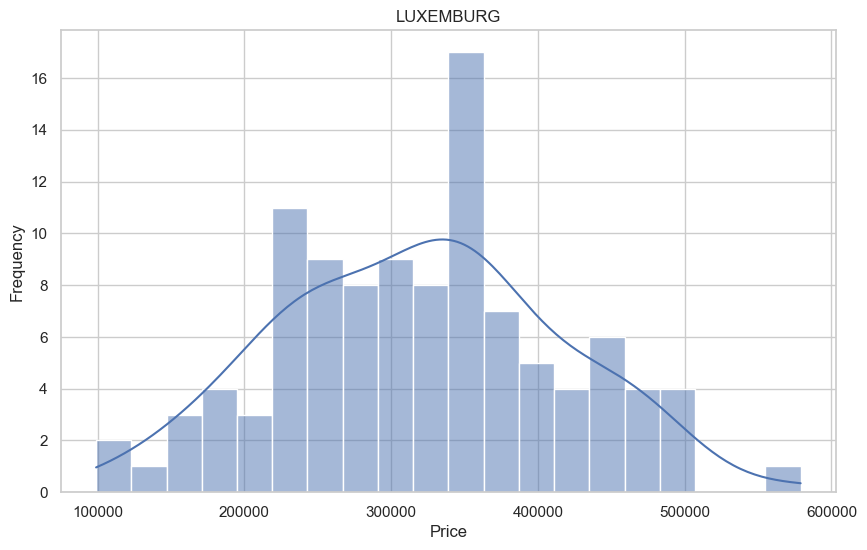

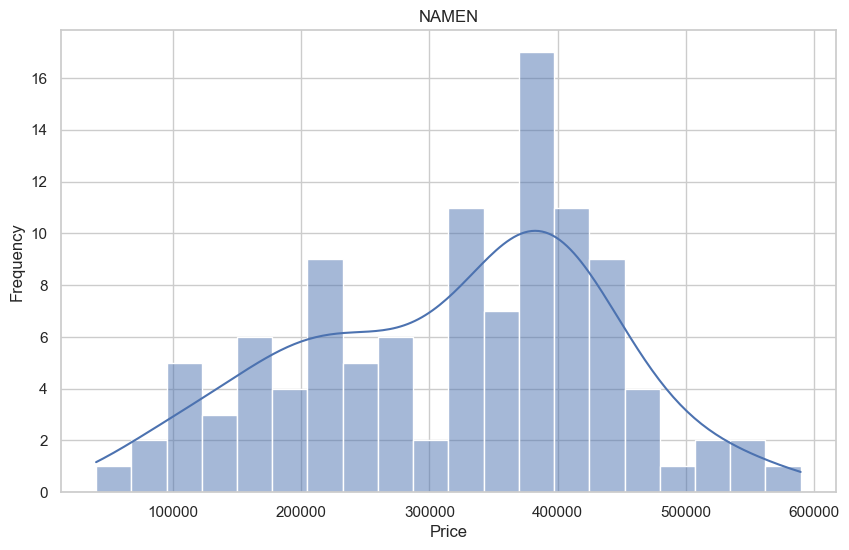

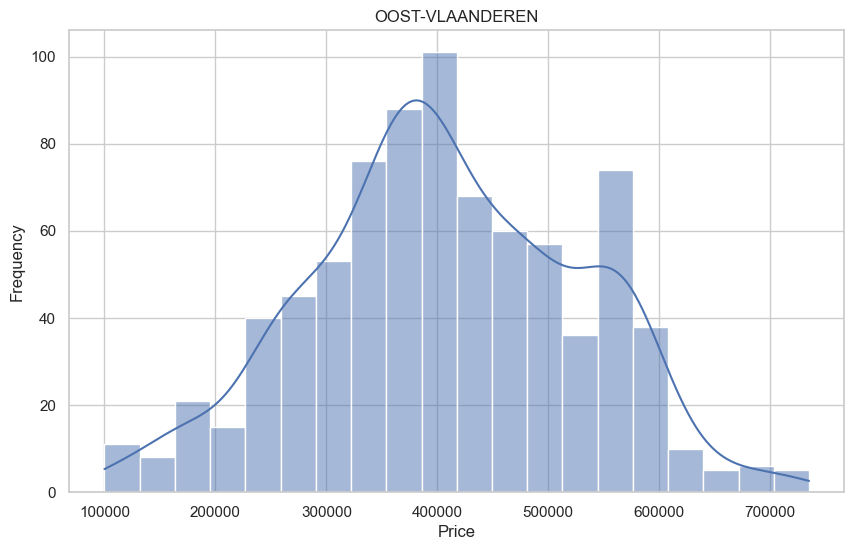

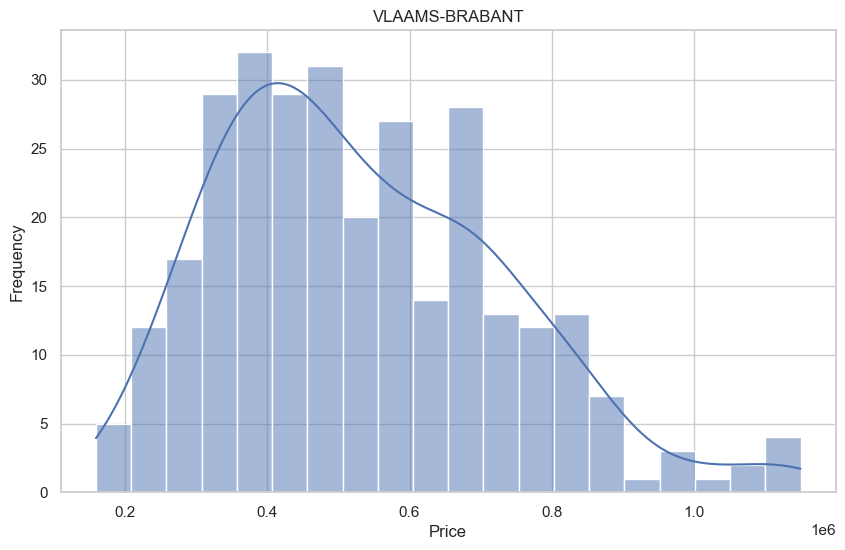

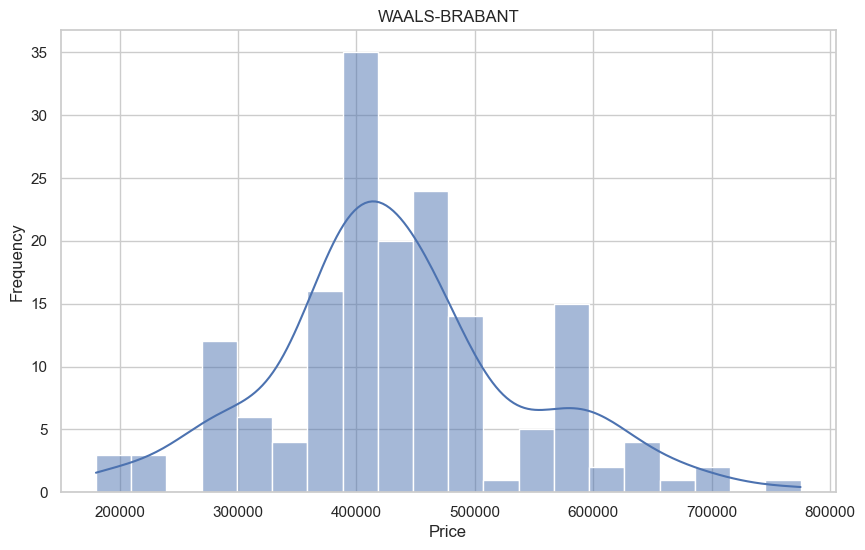

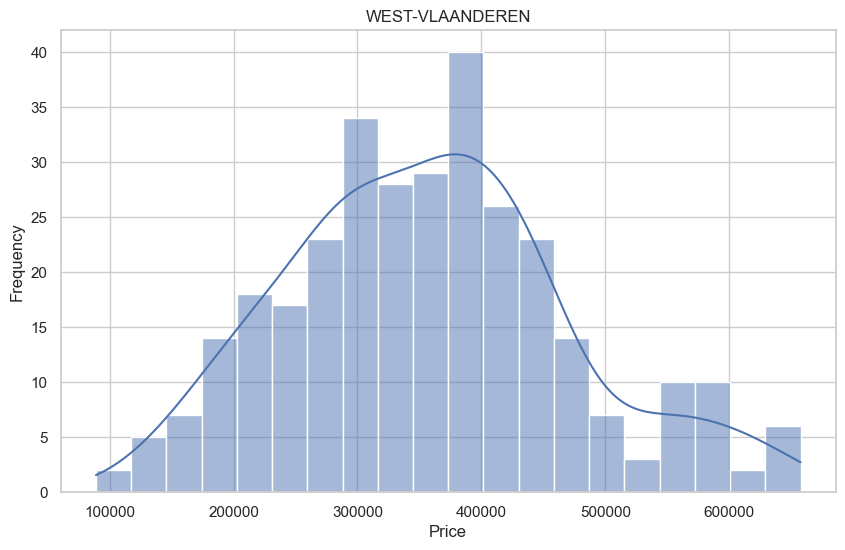

In [5]:
for prov in immo_H_clean.Province.unique():
    region_price = immo_H_clean[immo_H_clean['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    
    plt.show()  

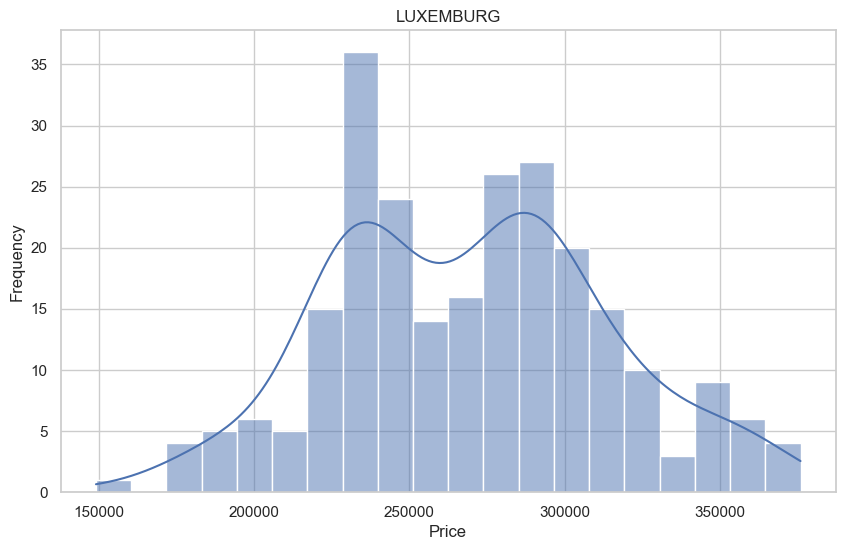

In [19]:
# Take LUXEMBURG for exploratory analysis
    
region_price = immo_AP_clean[immo_AP_clean['Province'] == 'LUXEMBURG']['Price']
sns.set(style="whitegrid")
    
plt.figure(figsize=(10, 6))
sns.histplot(region_price, bins=20, kde=True)


plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('LUXEMBURG')

plt.show()

In [6]:
# Calculating the two modes for provinces

mode_indexes = {}
modes = {}

for prov in immo_H_clean.Province.unique():

    frequencies, borders = np.histogram(immo_H_clean[immo_H_clean['Province'] == prov]['Price'], bins=10)  
    
    mode_indexes[prov] = frequencies.argsort()[-2:][::-1]
    modes[prov] = borders[mode_indexes[prov]]

print("The two modes:", modes)

The two modes: {'ANTWERPEN': array([309800., 383400.]), 'BRUSSEL': array([730000., 325000.]), 'HENEGOUWEN': array([256000., 199500.]), 'LIMBURG': array([309000., 239000.]), 'LUIK': array([178000., 271000.]), 'LUXEMBURG': array([339000., 291000.]), 'NAMEN': array([369700., 314750.]), 'OOST-VLAANDEREN': array([354000., 290500.]), 'VLAAMS-BRABANT': array([357200., 456300.]), 'WAALS-BRABANT': array([358500., 418000.]), 'WEST-VLAANDEREN': array([373250., 316400.])}


In [7]:
# Adding two new columns in two_modes_df depending on if Price is greater or not then the split_point for each Province

split_point = {}
two_modes_df = immo_H_clean.copy()
two_modes_df['left'] = 0
two_modes_df['right'] = 0

for prov, two_modes in modes.items():
    split_point[prov] = (two_modes[1] + two_modes[0]) / 2
    
    two_modes_df.loc[(two_modes_df['Province'] == prov) & (two_modes_df['Price'] < split_point[prov]), 'left'] = 1
    two_modes_df.loc[(two_modes_df['Province'] == prov) & (two_modes_df['Price'] >= split_point[prov]), 'right'] = 1

    
print(split_point)
two_modes_df


{'ANTWERPEN': 346600.0, 'BRUSSEL': 527500.0, 'HENEGOUWEN': 227750.0, 'LIMBURG': 274000.0, 'LUIK': 224500.0, 'LUXEMBURG': 315000.0, 'NAMEN': 342225.0, 'OOST-VLAANDEREN': 322250.0, 'VLAAMS-BRABANT': 406750.0, 'WAALS-BRABANT': 388250.0, 'WEST-VLAANDEREN': 344825.0}


,Price,Facades,Habitable Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,...,State of Building,Living Surface,EPC,Consumption Per m2,Municipality,Province,APARTMENT,HOUSE,left,right
0,269000,2.0,178.000000,HOUSE,4.0,1.0,2.0,5.0,3.0,0,...,3.0,32.000000,5.0,107.000000,TURNHOUT,ANTWERPEN,0,1,1,0
1,99000,4.0,33.000000,HOUSE,1.0,1.0,1.0,3.0,1.0,0,...,3.0,36.465753,4.0,371.896623,LILLE,ANTWERPEN,0,1,1,0
2,584000,3.0,284.000000,HOUSE,4.0,1.0,2.0,7.0,1.0,0,...,1.0,36.465753,4.0,371.896623,BORNEM,ANTWERPEN,0,1,0,1
3,299000,3.0,205.541958,HOUSE,3.0,1.0,1.0,4.0,1.0,0,...,2.0,41.000000,1.0,519.000000,HEIST-OP-DEN-BERG,ANTWERPEN,0,1,1,0
4,380600,3.0,209.000000,HOUSE,3.0,1.0,2.0,6.0,1.0,0,...,3.0,41.000000,4.0,371.896623,LAAKDAL,ANTWERPEN,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,229000,2.0,112.000000,HOUSE,2.0,1.0,2.0,3.0,1.0,0,...,1.0,37.600000,1.0,610.000000,BRUGGE,WEST-VLAANDEREN,0,1,1,0
3258,595834,4.0,225.000000,HOUSE,5.0,1.0,2.0,8.0,1.0,0,...,5.0,37.600000,3.0,354.949074,ICHTEGEM,WEST-VLAANDEREN,0,1,0,1
3259,647169,4.0,242.000000,HOUSE,5.0,1.0,2.0,8.0,1.0,0,...,5.0,37.600000,3.0,354.949074,ICHTEGEM,WEST-VLAANDEREN,0,1,0,1
3260,415000,4.0,183.090592,HOUSE,4.0,1.0,2.0,7.0,1.0,0,...,5.0,37.600000,4.0,256.000000,WAREGEM,WEST-VLAANDEREN,0,1,0,1


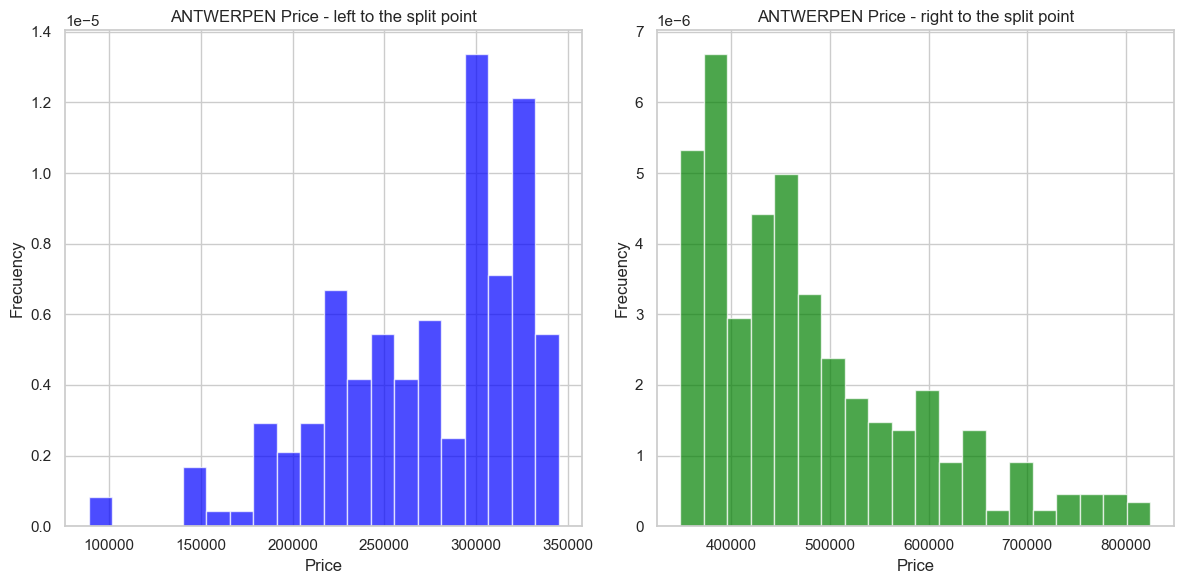

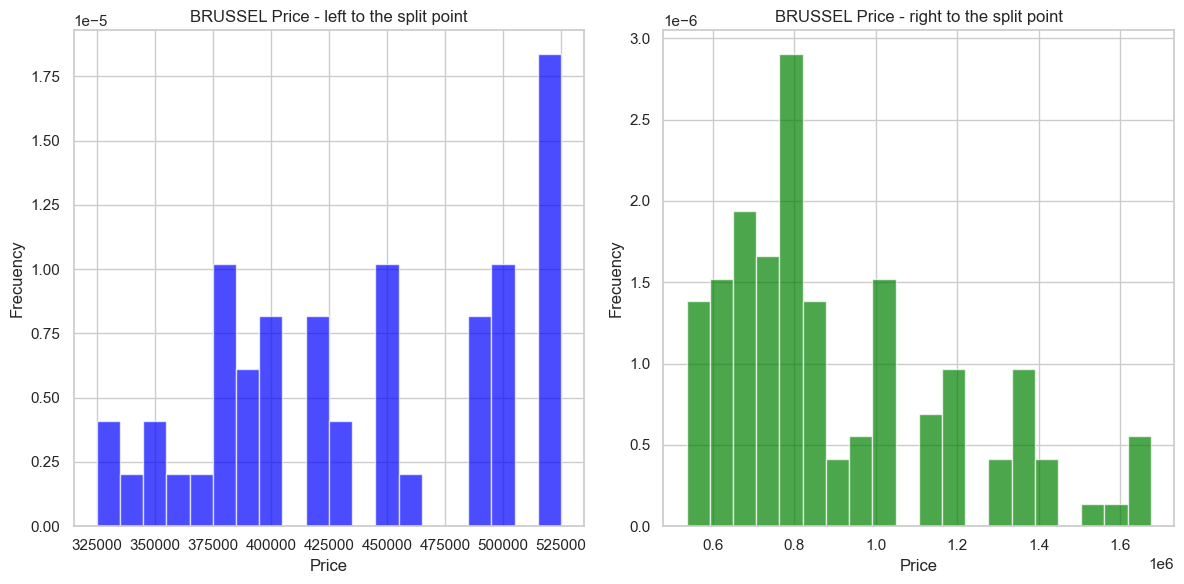

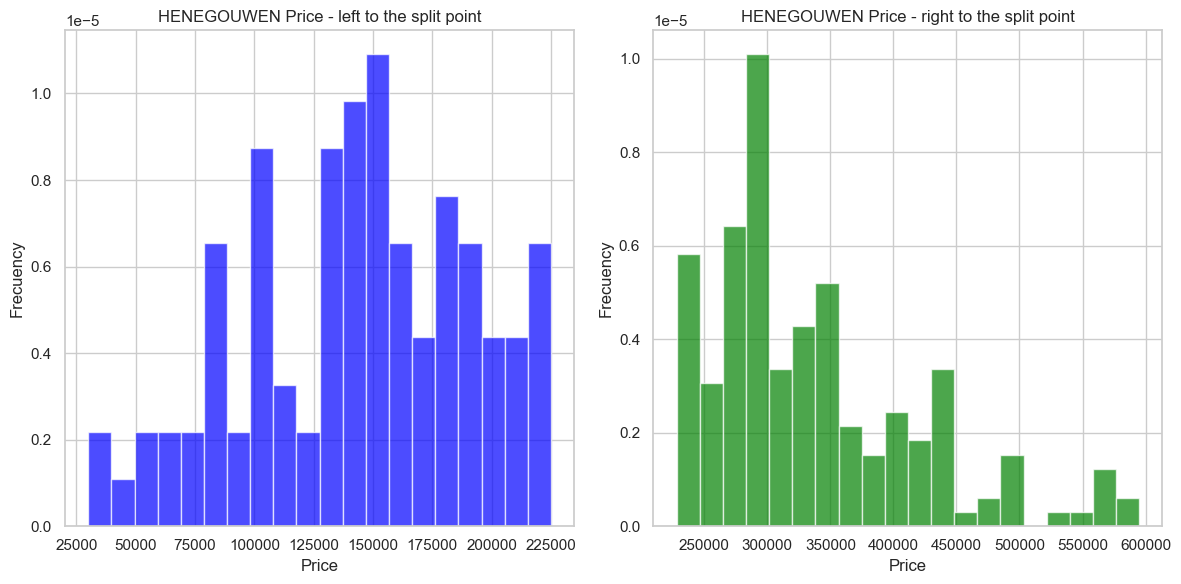

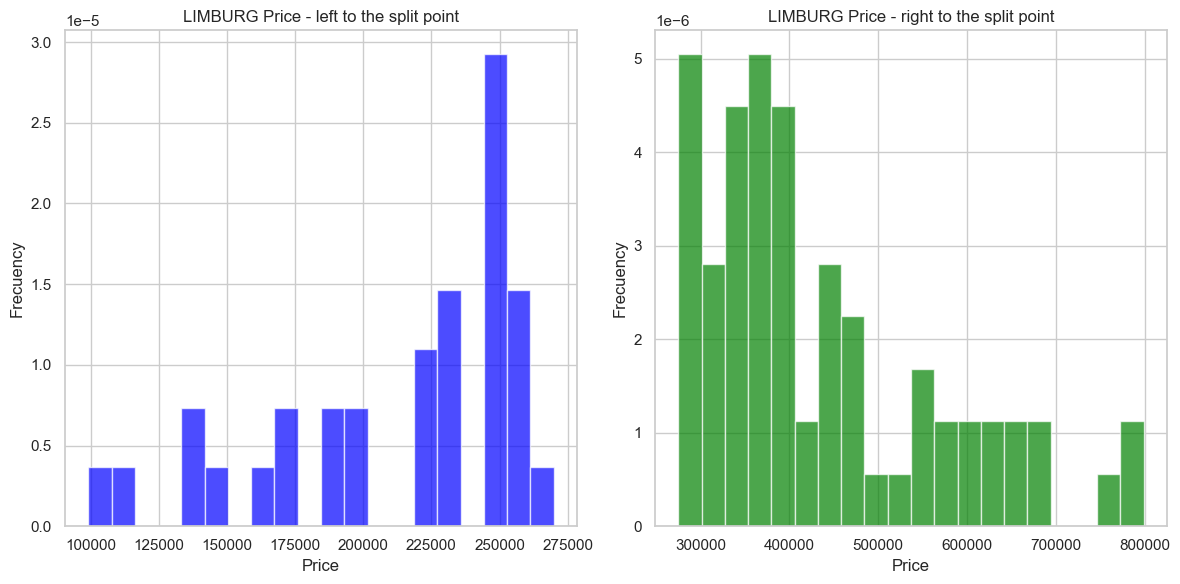

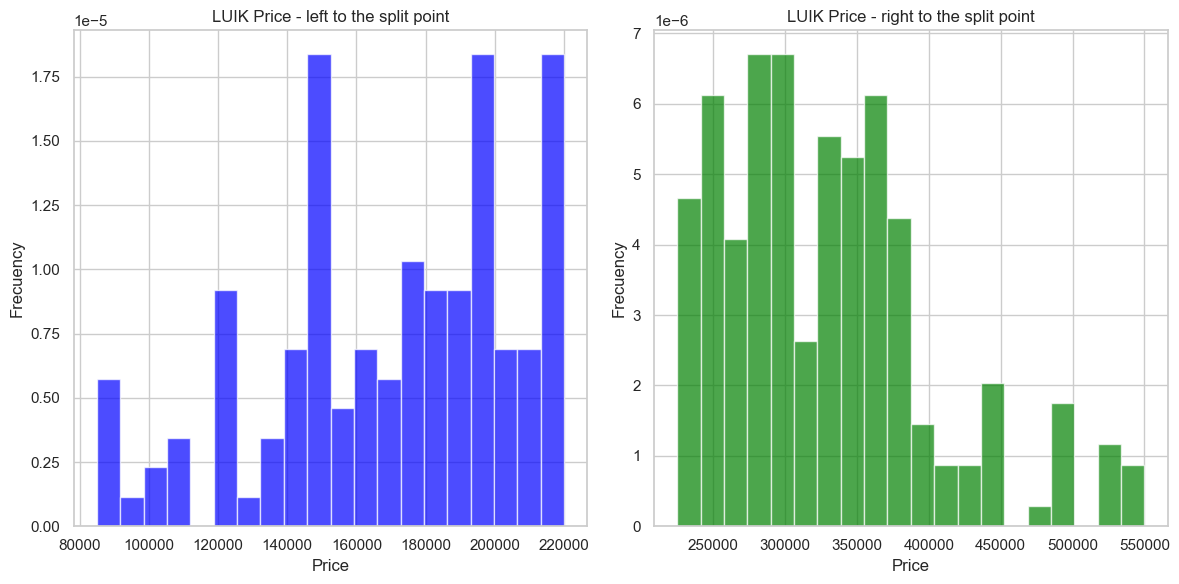

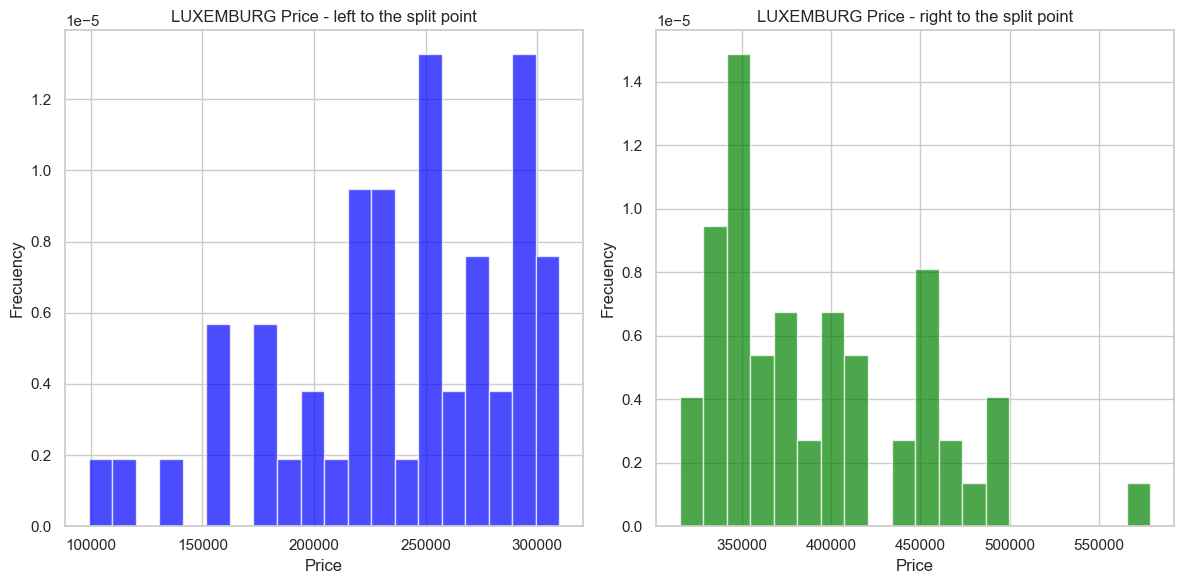

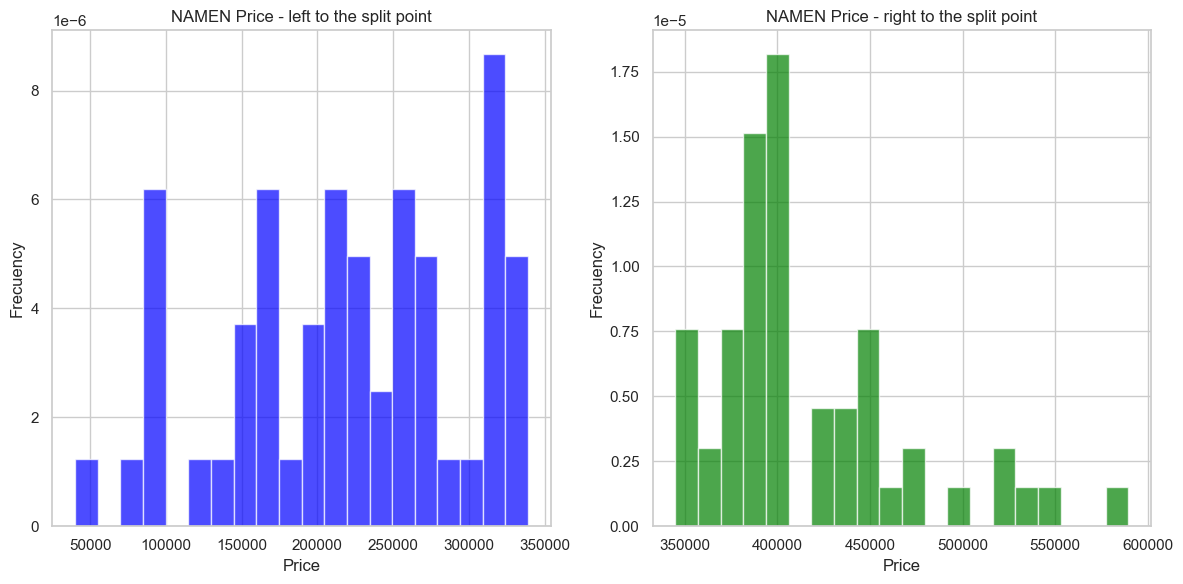

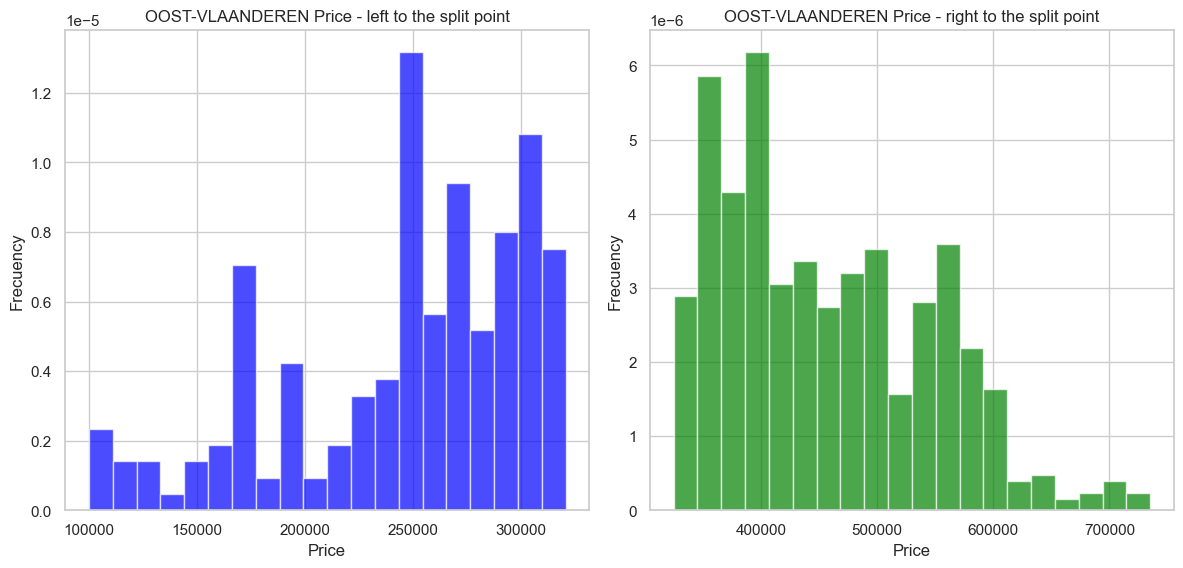

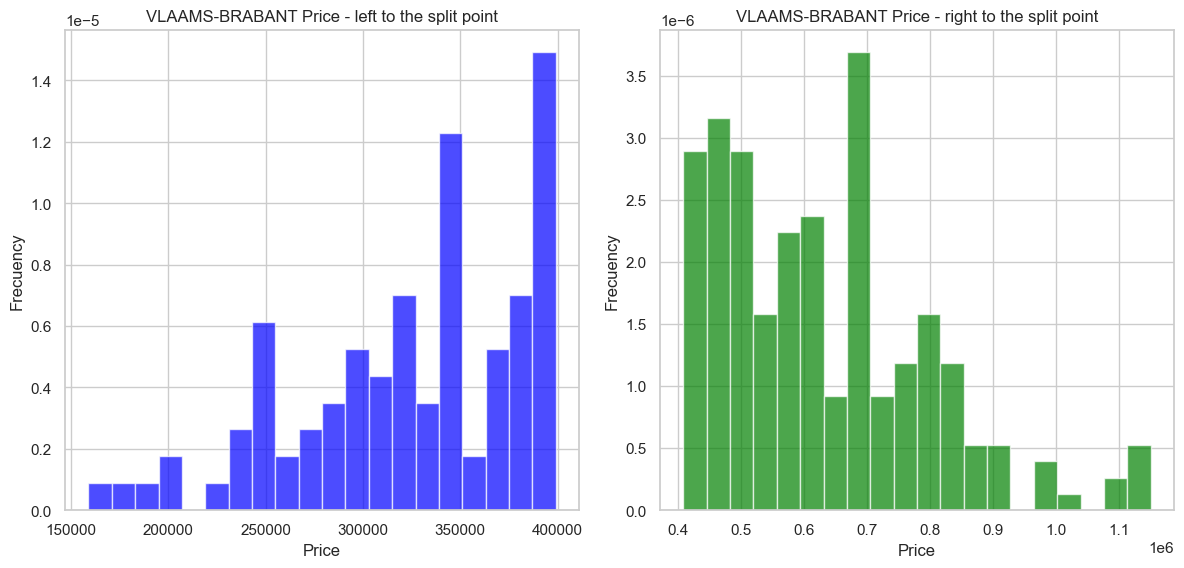

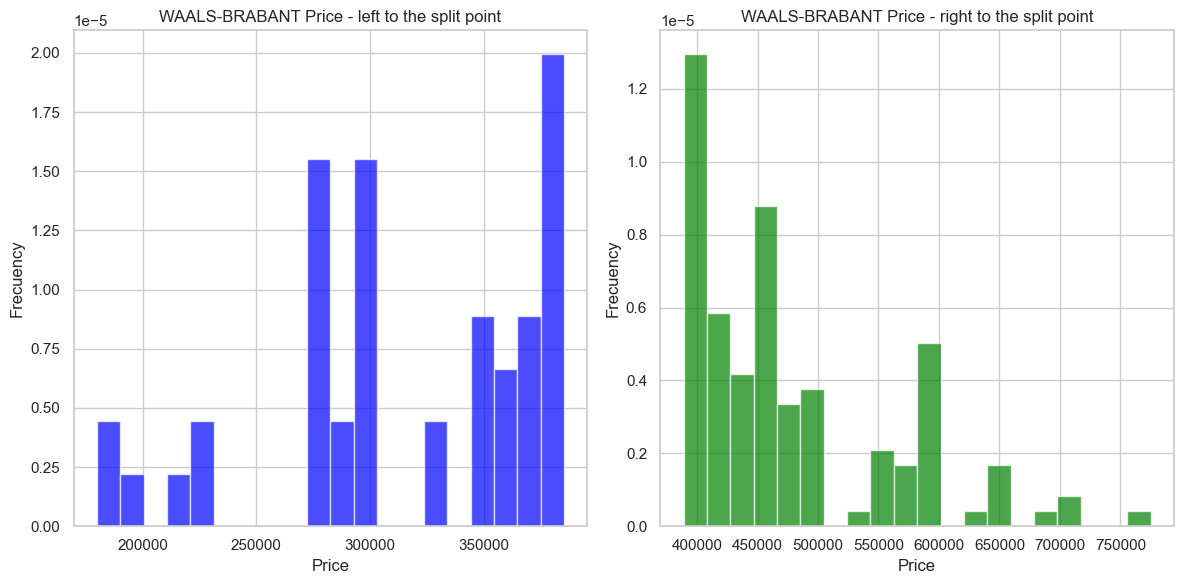

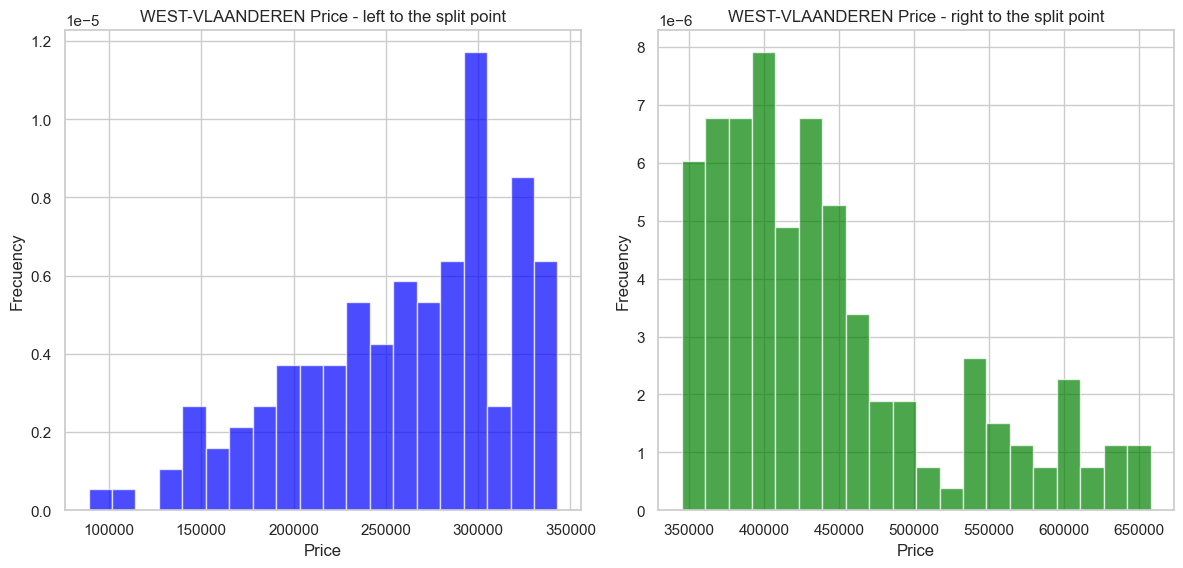

In [8]:
for prov in two_modes_df.Province.unique():

    df_left = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['left'] == 1)]
    df_right = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['right'] == 1)]
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(df_left['Price'], bins=20, color='blue', alpha=0.7, density=True)
    axs[0].set_title(f"{prov} Price - left to the split point")
    axs[0].set_xlabel('Price')
    axs[0].set_ylabel('Frecuency')
    
    
    
    axs[1].hist(df_right['Price'], bins=20, color='green', alpha=0.7, density=True)
    axs[1].set_title(f"{prov} Price - right to the split point")
    axs[1].set_xlabel('Price')
    axs[1].set_ylabel('Frecuency')
    
    plt.tight_layout()
    plt.show()

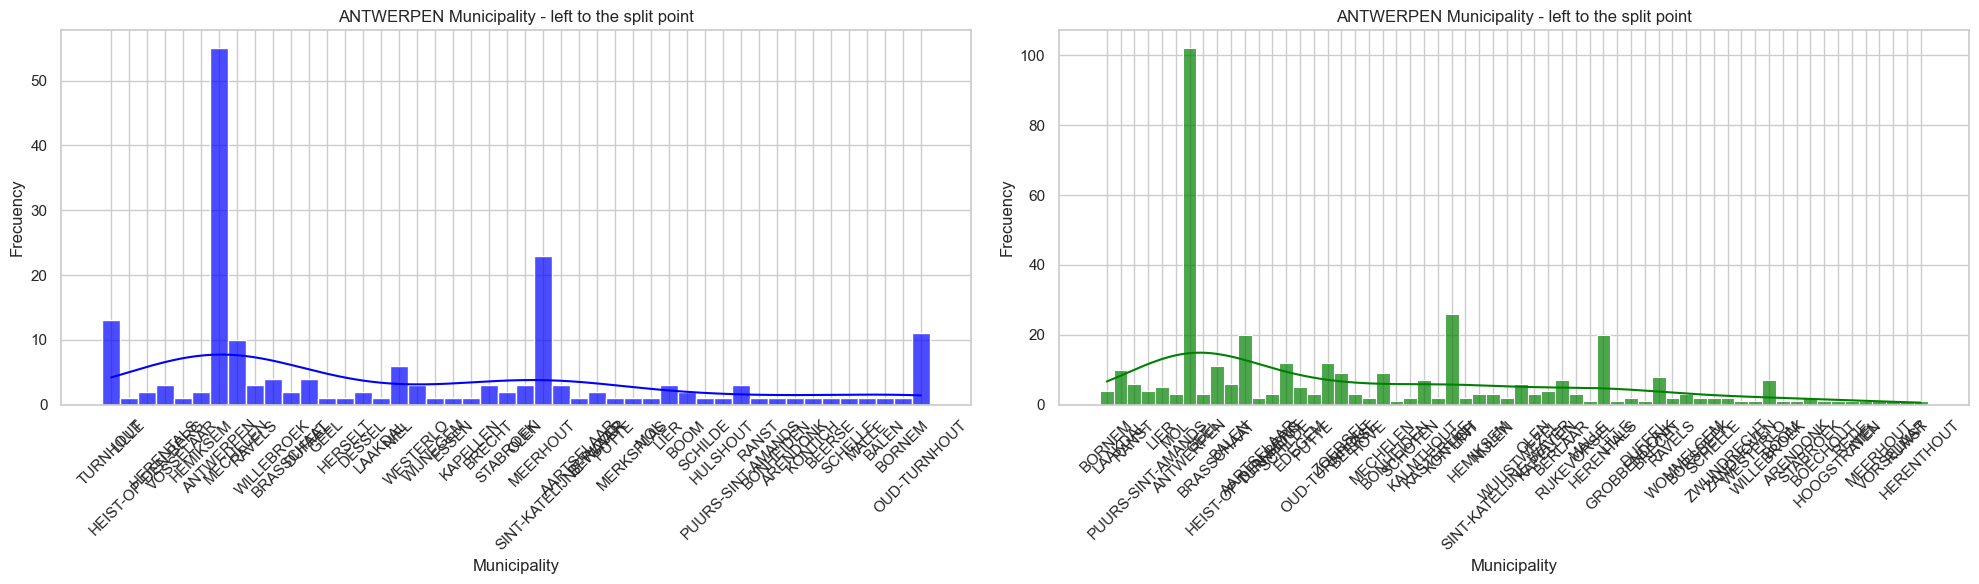

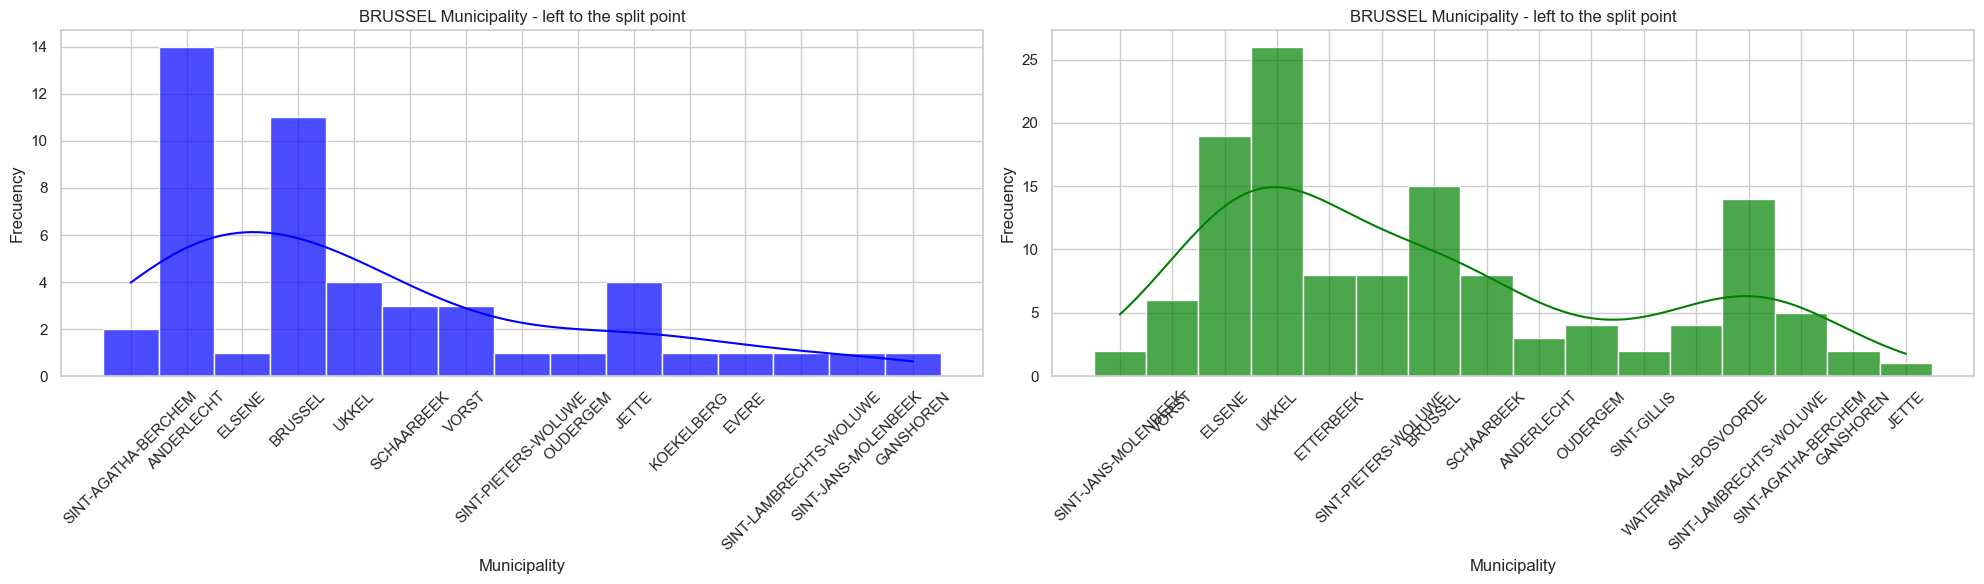

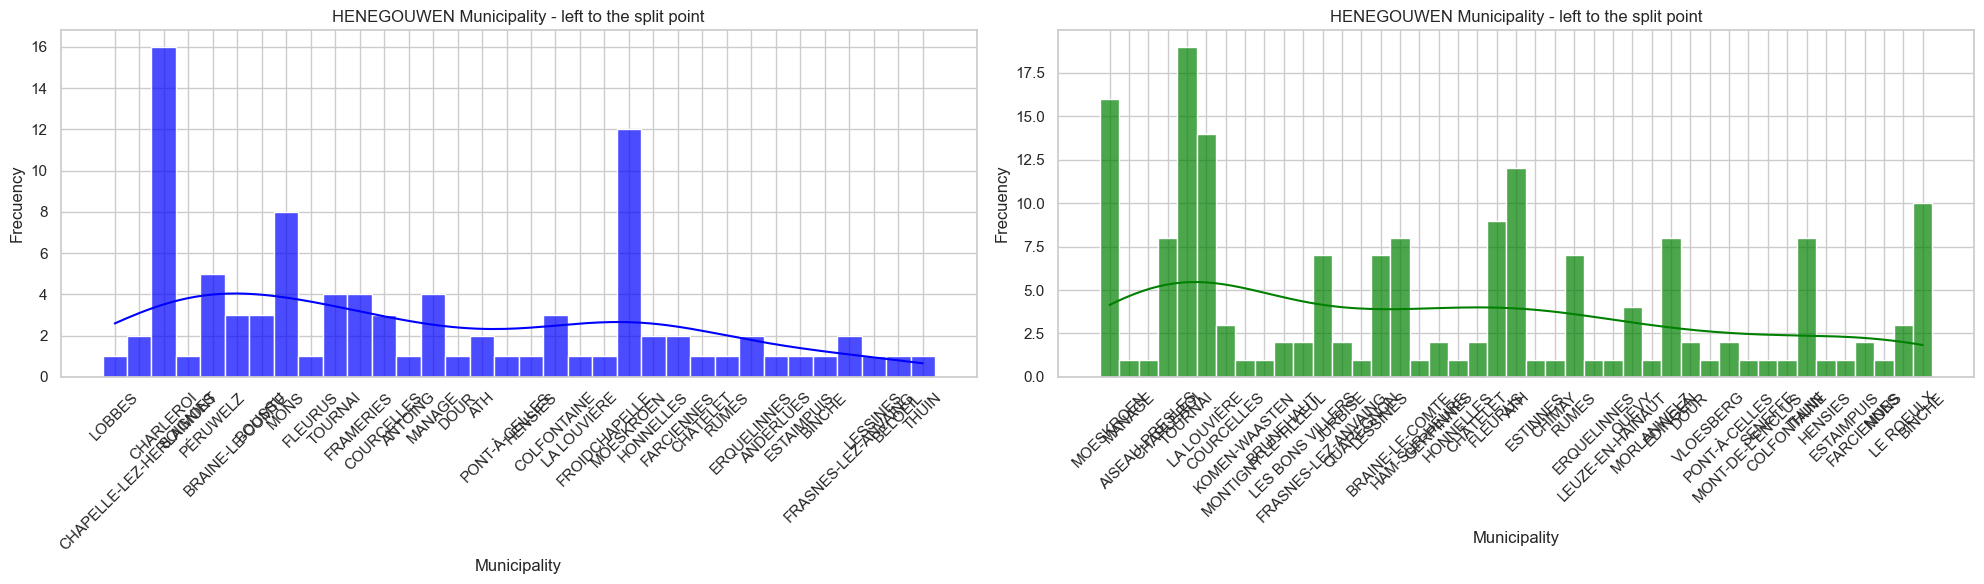

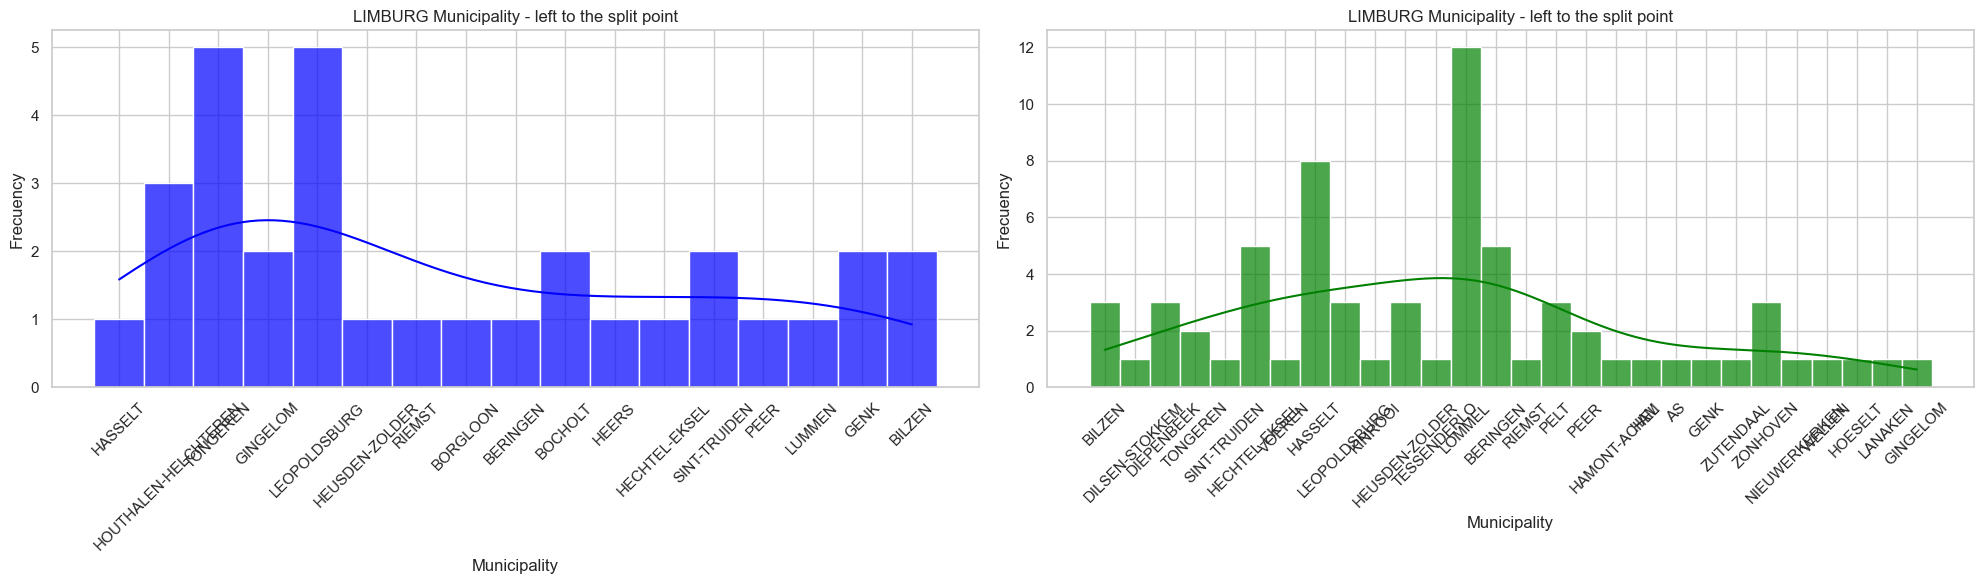

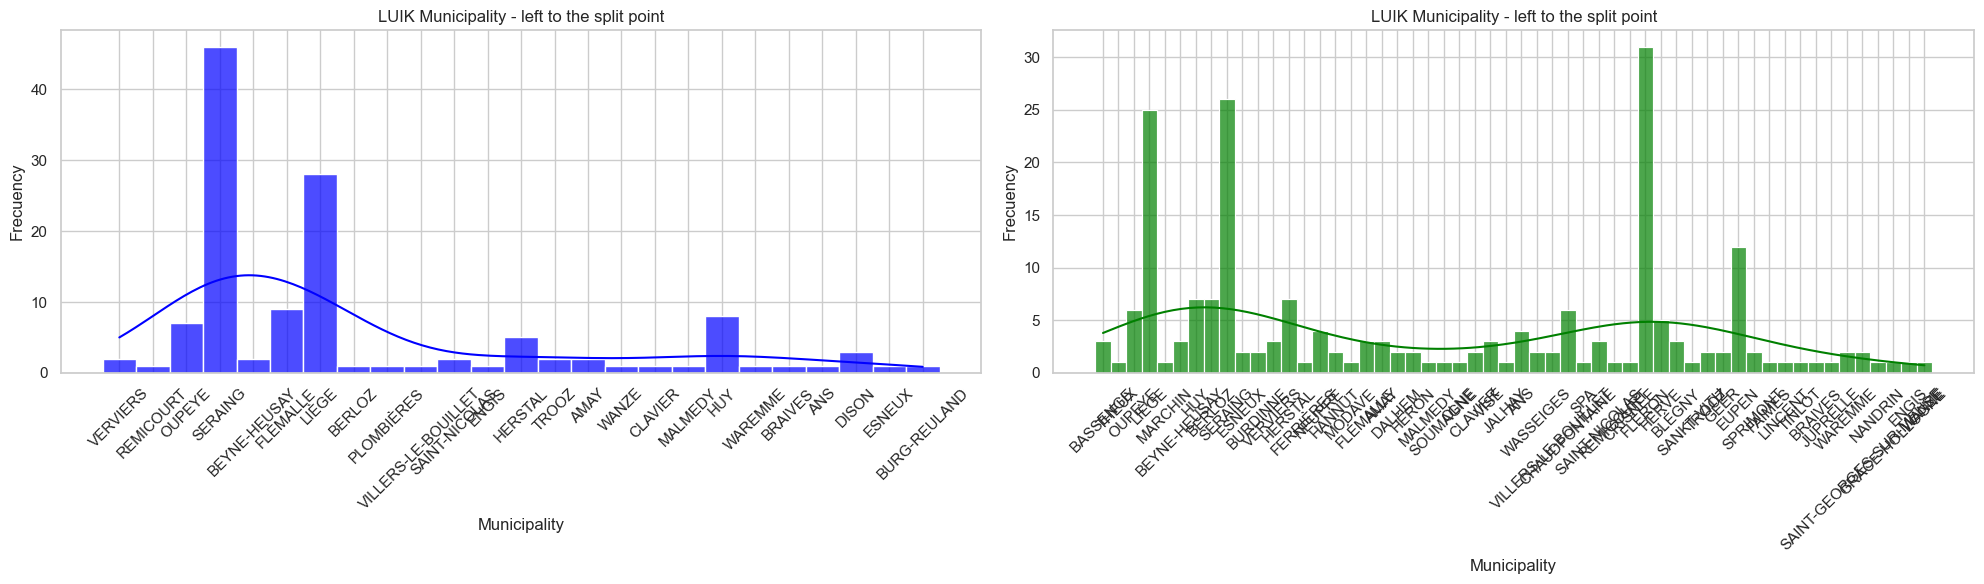

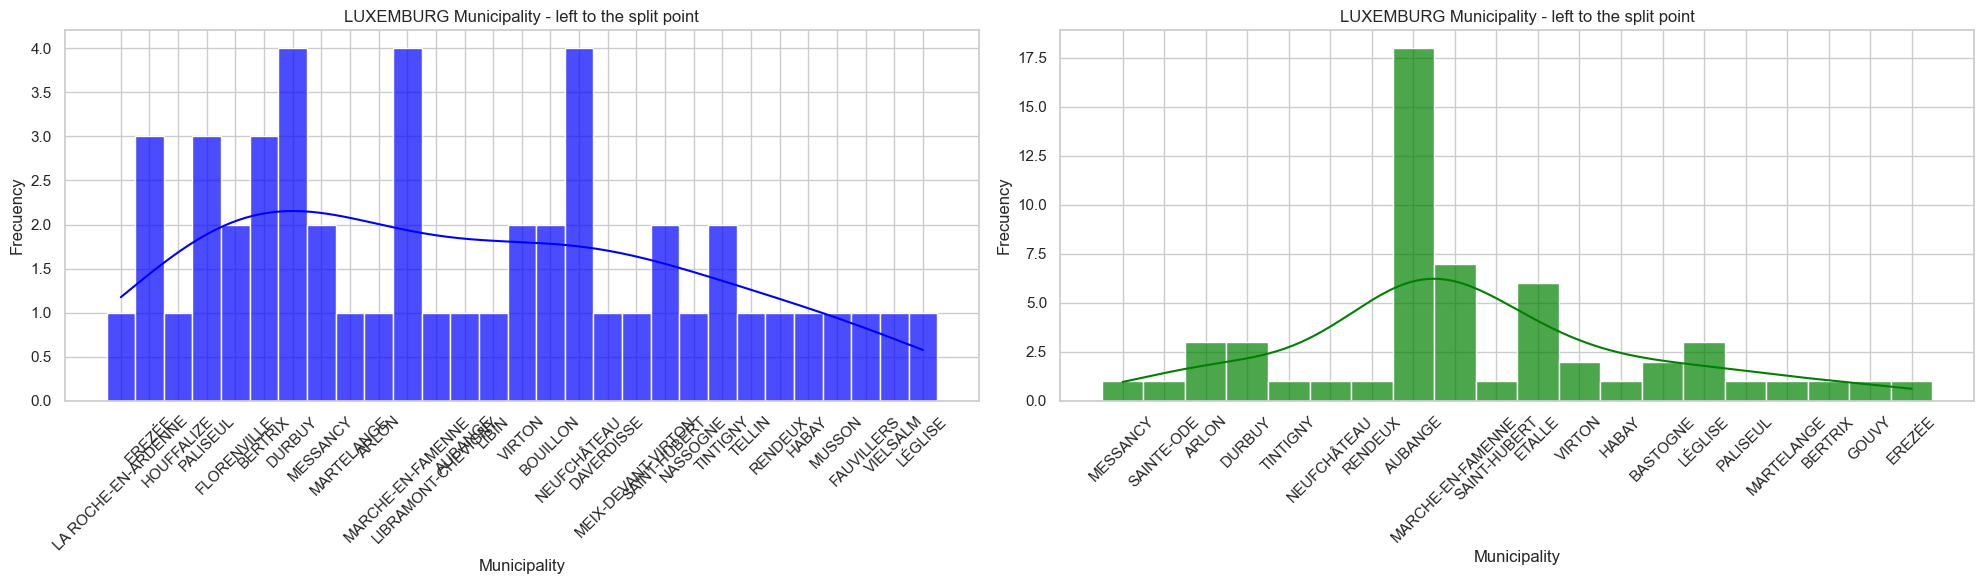

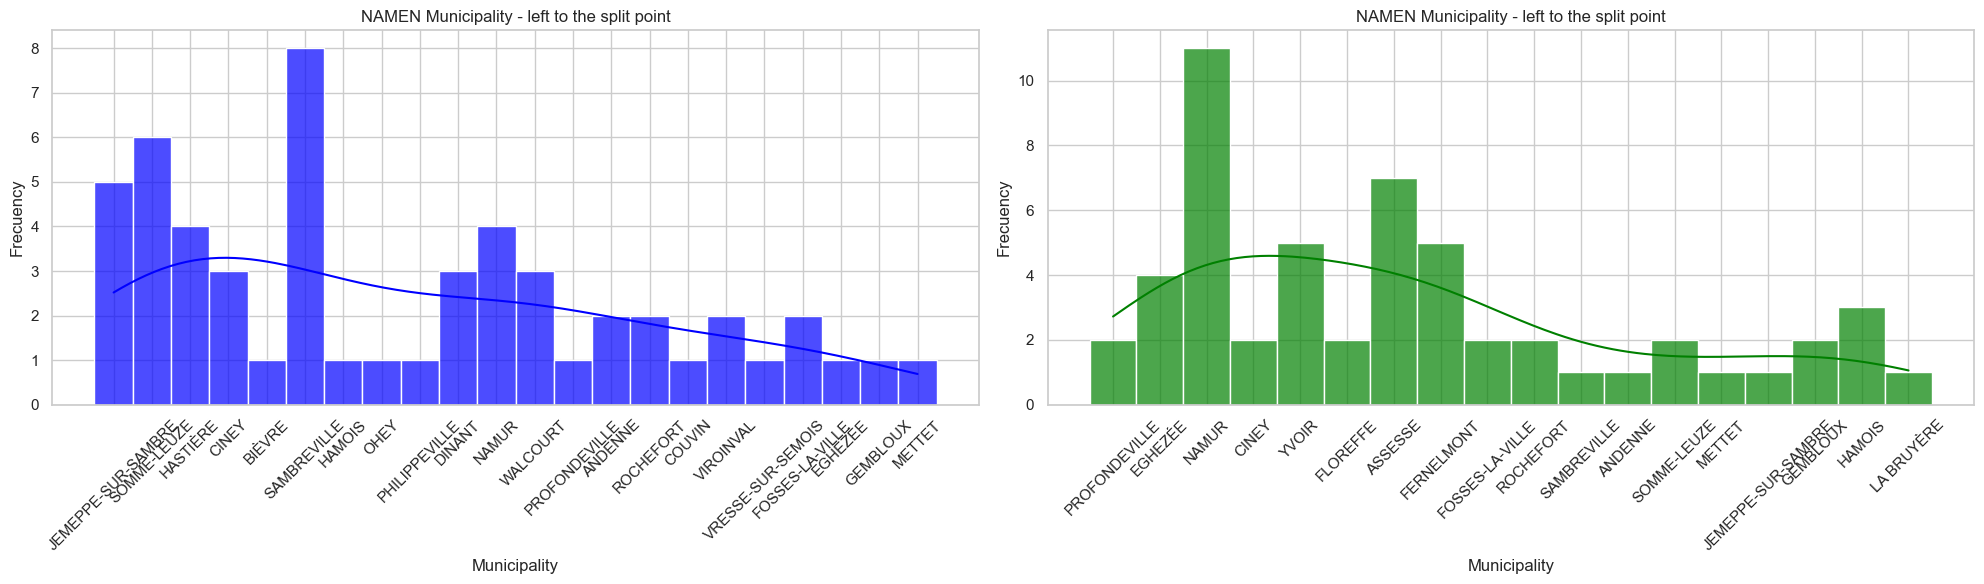

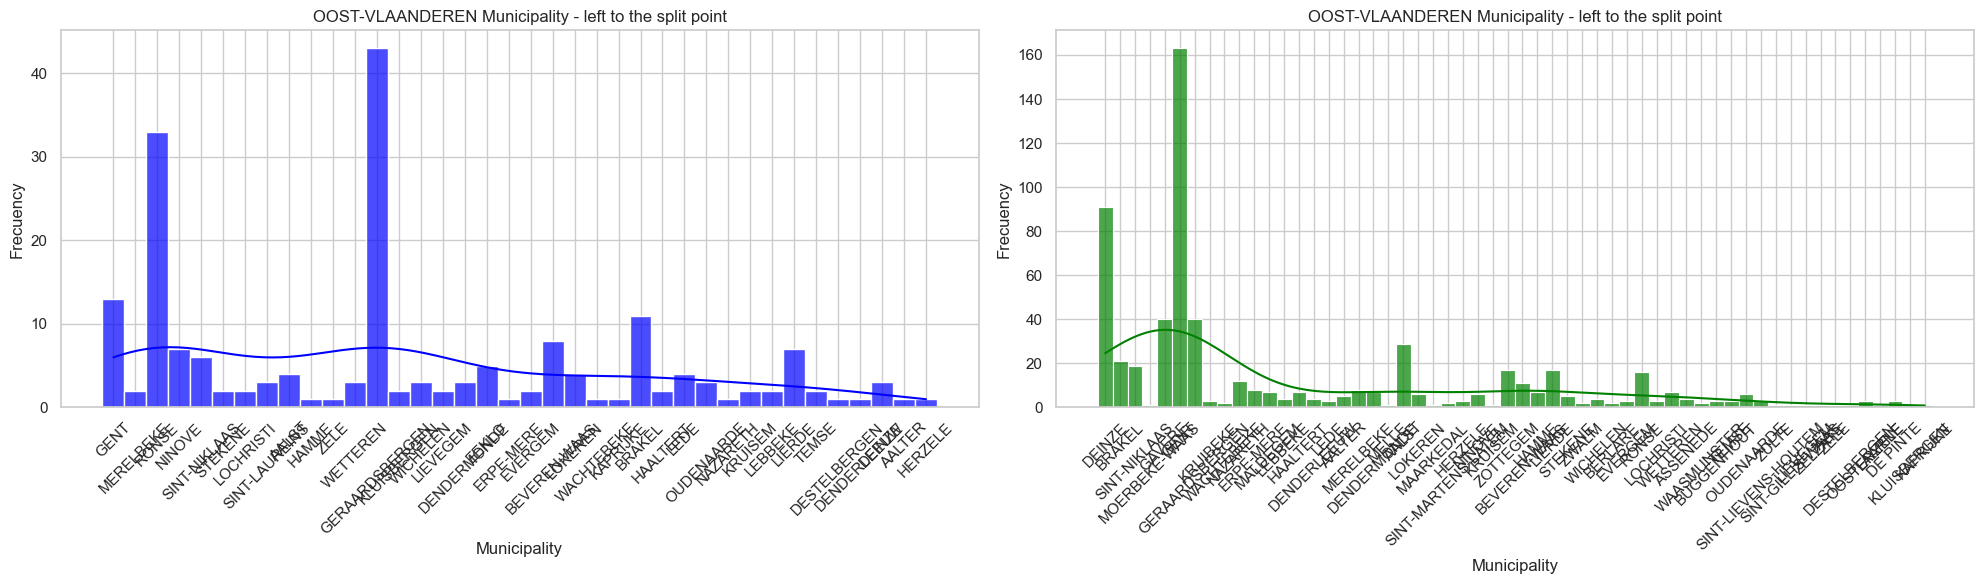

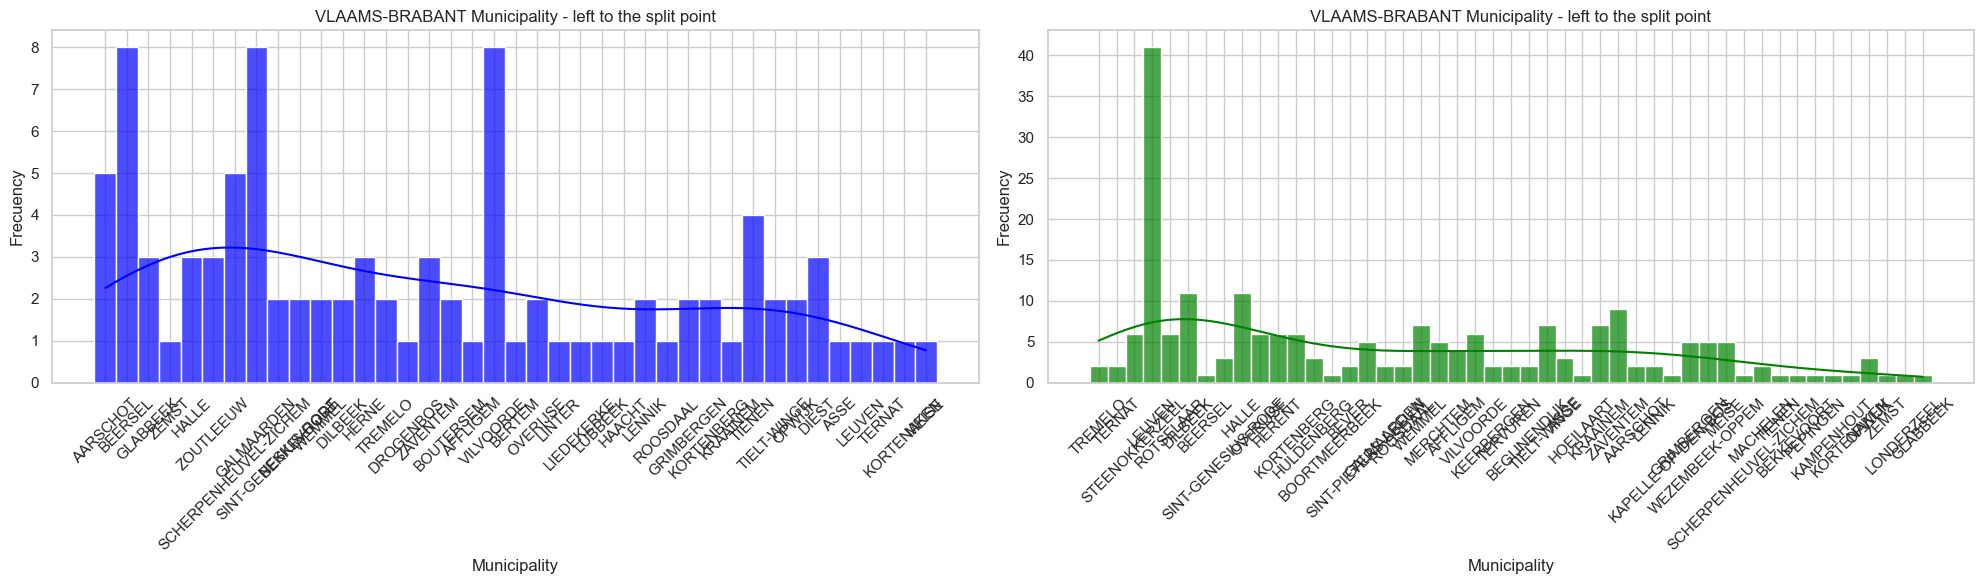

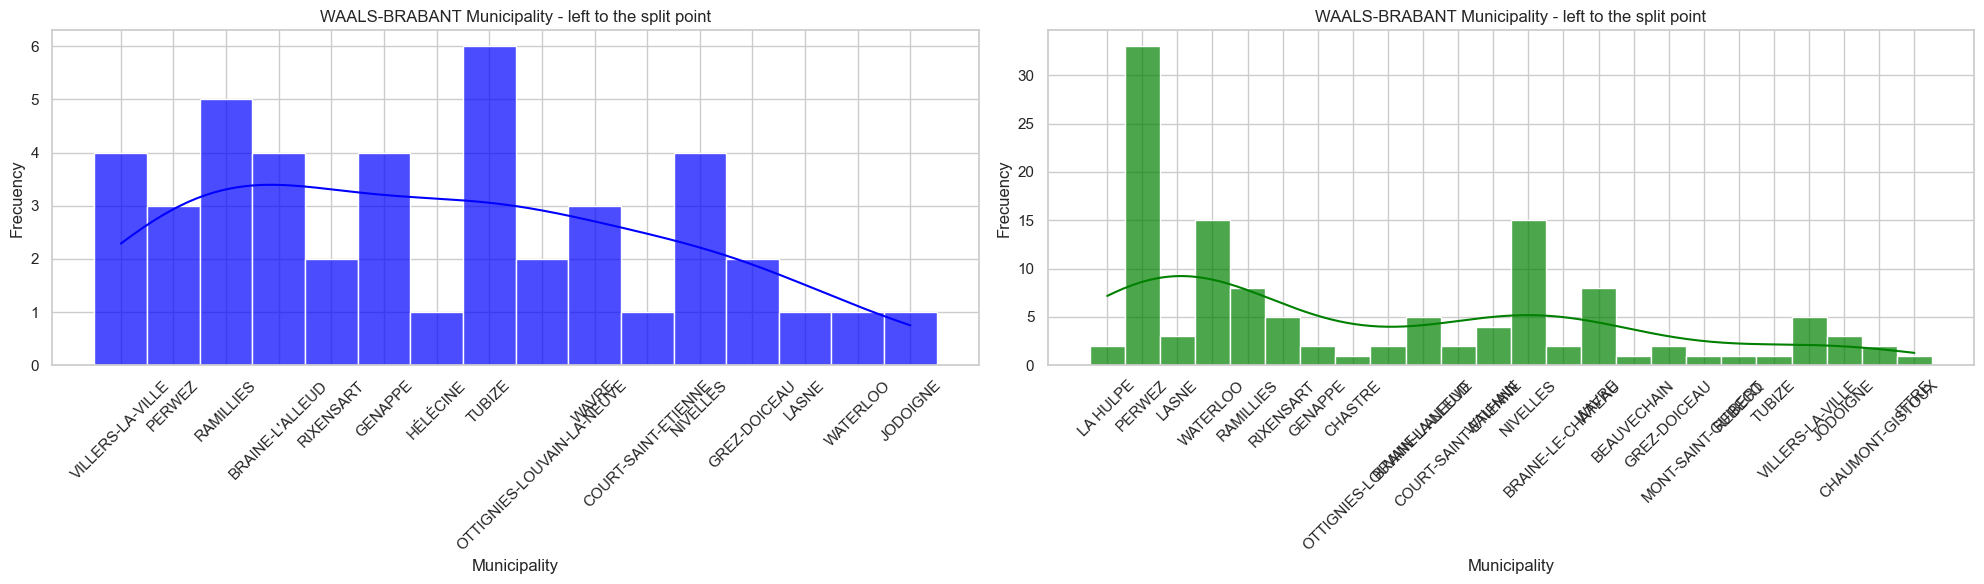

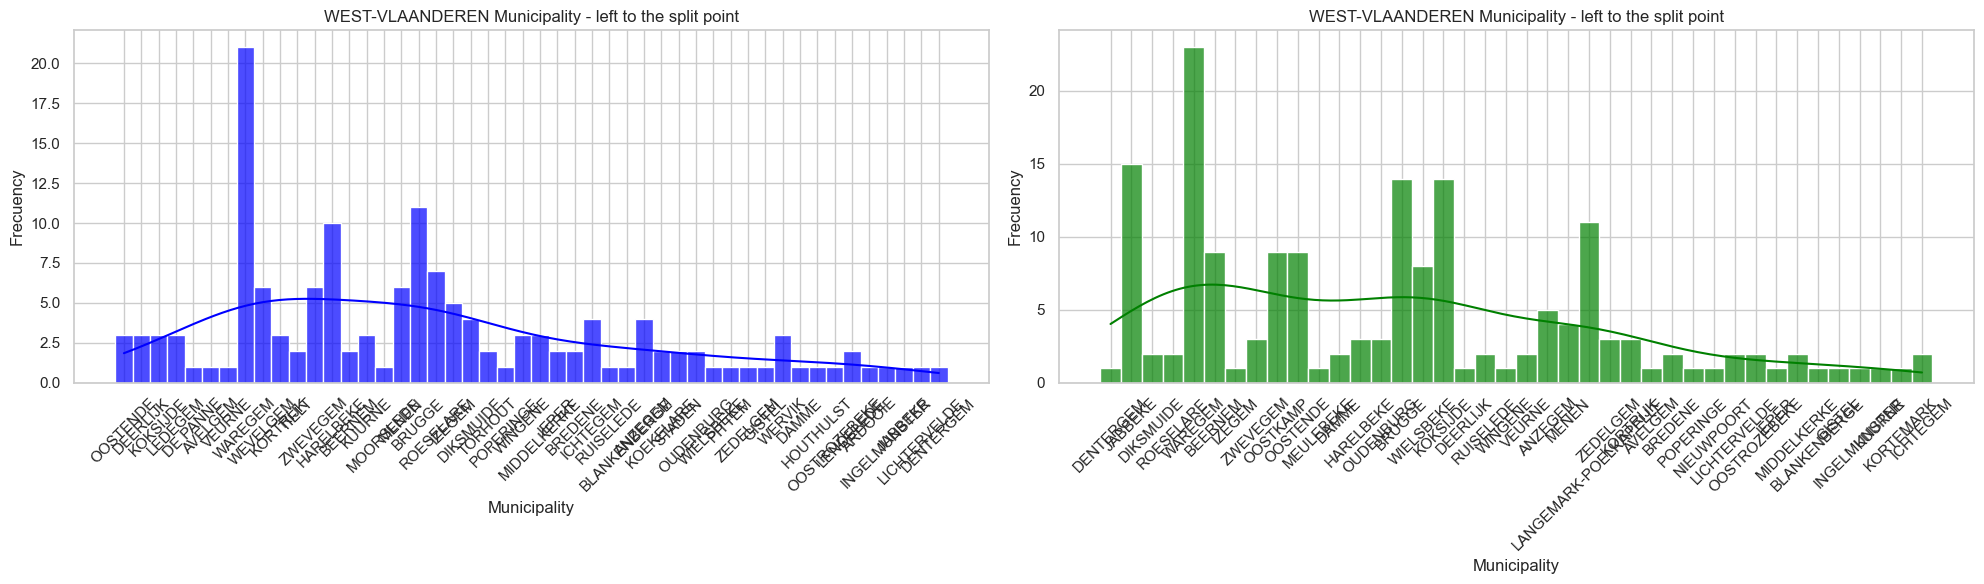

In [11]:
for prov in two_modes_df.Province.unique():

    df_left = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['left'] == 1)]
    df_right = two_modes_df[(two_modes_df['Province'] == prov) & (two_modes_df['right'] == 1)]
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    
    sns.histplot(df_left['Municipality'], bins=20, color='blue', alpha=0.7, kde=True, ax=axs[0])
    axs[0].set_title(f"{prov} Municipality - left to the split point")
    axs[0].set_xlabel('Municipality')
    axs[0].set_ylabel('Frecuency')
    axs[0].tick_params(axis='x', rotation=45)
    
    sns.histplot(df_right['Municipality'], bins=20, color='green', alpha=0.7, kde=True, ax=axs[1])
    axs[1].set_title(f"{prov} Municipality - left to the split point")
    axs[1].set_xlabel('Municipality')
    axs[1].set_ylabel('Frecuency')
    axs[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


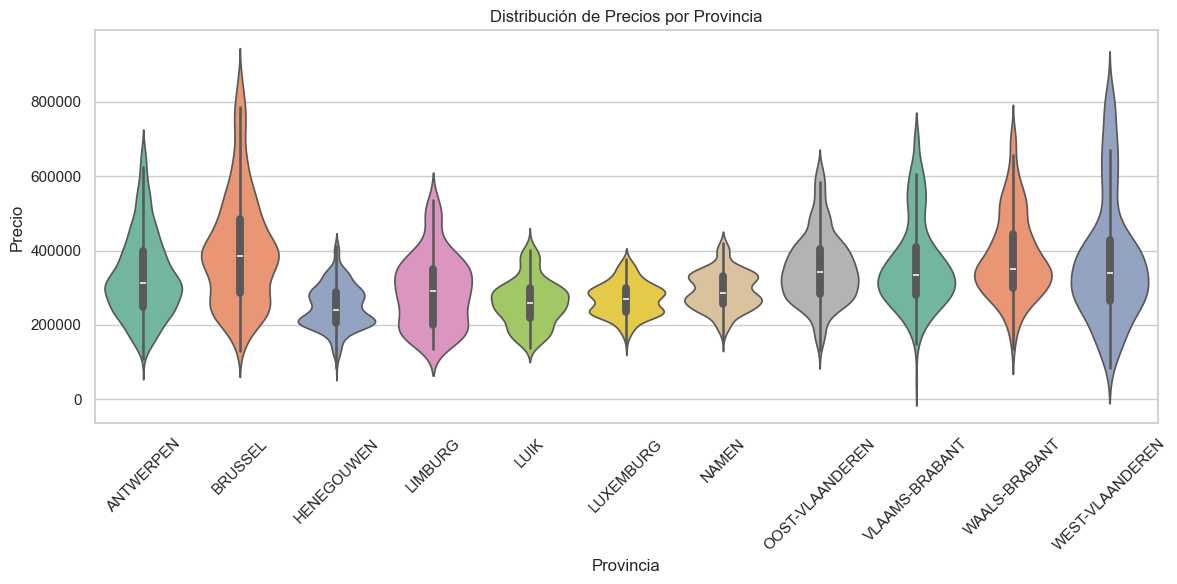

In [13]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar un violin plot de los precios por provincia
sns.violinplot(data=immo_AP_clean, x='Province', y='Price', palette='Set2', hue='Province')
plt.title('Distribución de Precios por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

plt.tight_layout()
plt.show()

In [ ]:

for prov in immo_AP_clean.Province.unique():
    plt.figure(figsize=(12, 6))
    
    data = immo_AP_clean[immo_AP_clean['Province'] == prov]
    
    sns.boxplot(data=data, x='Province', y='Price', palette='Set2')
    plt.title('Distribución de Precios por Provincia')
    plt.xlabel('Provincia')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
    
    plt.tight_layout()
    plt.show()